In [1]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

# K-Nearest Neighbors
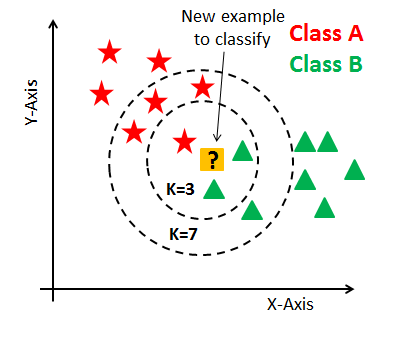

## Import Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import gradio as gr
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

<IPython.core.display.Javascript object>

# Classification

## Load data

In [3]:
DATA_PATH = "../data/"

<IPython.core.display.Javascript object>

In [4]:
contraception_df = pd.read_csv(os.path.join(DATA_PATH, "contraception_prevalence.csv"))

<IPython.core.display.Javascript object>

In [5]:
contraception_df.head()

,age,education,partner_education,number_of_children,is_islam,currently_working,standard_of_living,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,3,0,1
1,45,1,3,10,1,1,4,0,1
2,43,2,3,7,1,1,4,0,1
3,42,3,2,9,1,1,3,0,1
4,36,3,3,8,1,1,2,0,1


<IPython.core.display.Javascript object>

In [6]:
contraception_df.shape

(1473, 9)

<IPython.core.display.Javascript object>

In [7]:
contraception_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        1473 non-null   int64
 1   education                  1473 non-null   int64
 2   partner_education          1473 non-null   int64
 3   number_of_children         1473 non-null   int64
 4   is_islam                   1473 non-null   int64
 5   currently_working          1473 non-null   int64
 6   standard_of_living         1473 non-null   int64
 7   media_exposure             1473 non-null   int64
 8   contraceptive_method_used  1473 non-null   int64
dtypes: int64(9)
memory usage: 103.7 KB


<IPython.core.display.Javascript object>

In [8]:
contraception_df["contraceptive_method_used"].value_counts()

1    629
3    511
2    333
Name: contraceptive_method_used, dtype: int64

<IPython.core.display.Javascript object>

Label Details
* 1 = No-use
* 2 = Long-term
* 3 = Short-term

## Making Prediction

In [9]:
X = contraception_df.drop(["contraceptive_method_used"], axis=1)
y = contraception_df["contraceptive_method_used"]

<IPython.core.display.Javascript object>

In [10]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

<IPython.core.display.Javascript object>

In [11]:
prevalence_map = {1: "no_use", 2: "long_term", 3: "short_term"}


def predict_prevalence(
    age,
    education,
    partner_education,
    n_children,
    religion,
    is_working,
    standard_of_living,
    media_exposure,
):
    religion_ = 1 if religion == "Islam" else 0
    is_working_ = 0 if is_working else 1
    media_exposure_ = 1 if media_exposure else 0
    features = np.array(
        [
            [
                age,
                education,
                partner_education,
                n_children,
                religion_,
                is_working_,
                standard_of_living,
                media_exposure_,
            ]
        ]
    )
    prevalence = clf.predict(features)
    prevalence_text = prevalence_map[prevalence[0]]
    return "Contraception Prevalence: {}".format(prevalence_text)

<IPython.core.display.Javascript object>

In [12]:
iface = gr.Interface(
    fn=predict_prevalence,
    inputs=[
        "number",
        gr.inputs.Slider(minimum=1, maximum=4, step=1, default=1),
        gr.inputs.Slider(minimum=1, maximum=4, step=1, default=1),
        "number",
        gr.inputs.Radio(["Islam", "Non-Islam"]),
        gr.inputs.Checkbox(default=False),
        gr.inputs.Slider(minimum=1, maximum=4, step=1, default=1),
        gr.inputs.Checkbox(default=False),
    ],
    outputs="text",
)
iface.launch()

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

<IPython.core.display.Javascript object>